In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
%matplotlib inline

In [6]:
# Source: http://www.nyc.gov/html/nypd/html/analysis_and_planning/stop_question_and_frisk_report.shtml
df = pd.read_csv('2015.csv', parse_dates=['datestop'])

In [7]:
df.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM
0,2015,61,18,1012015,315,1,O,P,2.0,FELONY,...,,61,E,7,,1000091,156314,CM,1,14
1,2015,22,5,1152015,1747,A,O,P,1.0,FELONY,...,,22,E,14,,994617,227693,CM,1,20
2,2015,20,36,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78
3,2015,20,38,1292015,1745,1,O,P,1.0,MIDS,...,,20,H,,16,991510,225019,CM,1,78
4,2015,20,41,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78


In [8]:
selection = df[['perobs', 'crimsusp', 'perstop', 'explnstp', 'arstmade', 'sumissue', 'sumoffen', 'frisked', 'rf_vcrim', 'rf_othsw', 'rf_attir', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_other', 'pf_pepsp', 'detailCM', 'sex', 'race', 'age', 'state', 'city']]
selection.head()

,perobs,crimsusp,perstop,explnstp,arstmade,sumissue,sumoffen,frisked,rf_vcrim,rf_othsw,...,pf_baton,pf_hcuff,pf_other,pf_pepsp,detailCM,sex,race,age,state,city
0,2.0,FELONY,10,Y,N,N,,Y,N,N,...,N,N,N,N,14,M,W,33,,BROOKLYN
1,1.0,FELONY,4,Y,N,N,,Y,Y,Y,...,N,N,N,N,20,M,B,14,,MANHATTAN
2,1.0,MISD,16,Y,N,N,,N,N,N,...,N,N,N,N,78,M,B,14,,MANHATTAN
3,1.0,MIDS,16,Y,N,N,,N,N,N,...,N,N,N,N,78,M,B,14,,MANHATTAN
4,1.0,MISD,16,Y,N,N,,N,N,N,...,N,N,N,N,78,M,B,13,,MANHATTAN


# How many total stops are there? How do they distribute over boroughs?

In [9]:
selection['city'].value_counts()

BROOKLYN     6354
QUEENS       5718
BRONX        4754
MANHATTAN    3941
STATEN IS    1796
Name: city, dtype: int64

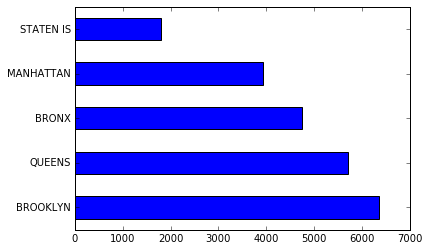

In [10]:
selection['city'].value_counts().plot(kind='barh')

# How do stop-and-frisks evolve over time?

In [11]:
# dateutil.parser.parse("1012015")
# http://stackoverflow.com/questions/502726/converting-date-between-dd-mm-yyyy-and-yyyy-mm-dd
dateutil.parser.parse(datetime.datetime.strptime("1012015", "%m%d%Y").strftime("%Y-%m-%d"))

datetime.datetime(2015, 10, 1, 0, 0)

In [12]:
def time_conversion(date_str):
    return dateutil.parser.parse(datetime.datetime.strptime(date_str, "%m%d%Y").strftime("%Y-%m-%d"))

In [13]:
df.index = df['datestop'].apply(time_conversion)

In [14]:
df.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM
datestop,,,,,,,,,,,,,,,,,,,,,
2015-10-01,2015,61,18,1012015,315,1,O,P,2.0,FELONY,...,,61,E,7,,1000091,156314,CM,1,14
2015-11-05,2015,22,5,1152015,1747,A,O,P,1.0,FELONY,...,,22,E,14,,994617,227693,CM,1,20
2015-12-09,2015,20,36,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78
2015-12-09,2015,20,38,1292015,1745,1,O,P,1.0,MIDS,...,,20,H,,16,991510,225019,CM,1,78
2015-12-09,2015,20,41,1292015,1745,1,O,P,1.0,MISD,...,,20,H,,16,991510,225019,CM,1,78


In [15]:
df['year'].count()

22563

In [16]:
# fig, ax = plt.subplots(figsize=(10,5))
# ax = df.resample('m')['datestop'].count().plot(ax = ax)

# plt.savefig("ugly_graph.pdf", transparent=True)

# Does race relate to being stopped?

In [17]:
selection['race'].value_counts()

B    11950
Q     5090
W     2514
P     1409
A     1103
Z      298
U      122
I       77
Name: race, dtype: int64

In [18]:
selection['race'].value_counts()

B    11950
Q     5090
W     2514
P     1409
A     1103
Z      298
U      122
I       77
Name: race, dtype: int64

In [19]:
# B = Black, Q = Hispanic, W = White, P = Black-Hispanic, A = Asian, 
# Z = Other, U = X? = Unknown, I = American Indian/Alaska Native

# NYC Population by race:
# White: 33%
# Black: 26%
# Hispanic: 26%
# Asian: 13%
# Other: 2%
#Source: http://furmancenter.org/files/sotc/The_Changing_Racial_and_Ethnic_Makeup_of_New_York_City_Neighborhoods_11.pdf

# Do officers explain the reason for stopping someone?

In [20]:
selection.groupby(by='race')['explnstp'].value_counts()

race  explnstp
A     Y            1101
      N               2
B     Y           11935
      N              15
I     Y              77
P     Y            1406
      N               3
Q     Y            5085
      N               5
U     Y             122
W     Y            2511
      N               3
Z     Y             298
Name: explnstp, dtype: int64

# Does race relate to being frisked?

In [21]:
selection.groupby(by='race')['frisked'].value_counts()

race  frisked
A     Y           662
      N           441
B     Y          8513
      N          3437
I     Y            48
      N            29
P     Y           996
      N           413
Q     Y          3382
      N          1708
U     Y            84
      N            38
W     Y          1387
      N          1127
Z     Y           185
      N           113
Name: frisked, dtype: int64

(-0.020340208121158485, 0.02, -0.02018424623968745, 0.020287697927793374)

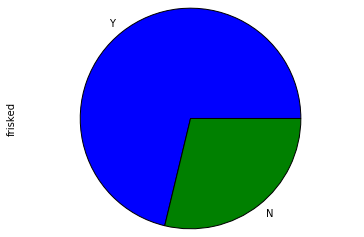

In [22]:
black_df = selection[selection['race']=="B"]
black_df['frisked'].value_counts().plot(kind='pie', radius=0.02)
plt.axis('equal')

(-1.0098179351085574, 1.0, -1.0251852673107418, 1.0102857268869616)

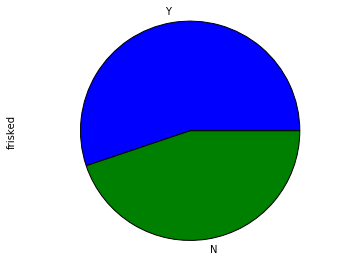

In [23]:
white_df = selection[selection['race']=="W"]
white_df['frisked'].value_counts().plot(kind='pie')
plt.axis('equal')

(-1.0123806238024511,
 1.0000000395196889,
 -1.0163664886331942,
 1.0123817851464478)

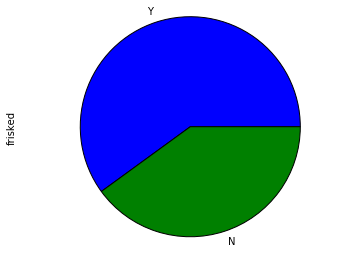

In [24]:
Asian_df = selection[selection['race']=="A"]
Asian_df['frisked'].value_counts().plot(kind='pie')
plt.axis('equal')

(-1.0017803773077611,
 1.000000033089427,
 -1.0017990301376043,
 1.0009039625524343)

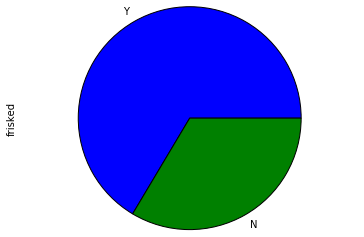

In [25]:
hispanic_df = selection[selection['race']=="Q"]
hispanic_df['frisked'].value_counts().plot(kind='pie')
plt.axis('equal')

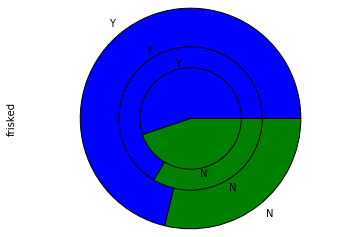

In [40]:
black_df['frisked'].value_counts().plot(kind='pie', radius=1)
hispanic_df['frisked'].value_counts().plot(kind='pie', radius=0.65,)
white_df['frisked'].value_counts().plot(kind='pie', radius =0.46)
plt.axis('equal')
plt.savefig('FriskedNEW.pdf', transparend=True)

In [27]:
# http://pandas.pydata.org/pandas-docs/stable/visualization.html

# Was an arrest made?

In [28]:
selection.groupby(by='race')['arstmade'].value_counts()

race  arstmade
A     N            983
      Y            120
B     N           9957
      Y           1993
I     N             69
      Y              8
P     N           1076
      Y            333
Q     N           4000
      Y           1090
U     N             97
      Y             25
W     N           2170
      Y            344
Z     N            243
      Y             55
Name: arstmade, dtype: int64

In [29]:
selection['arstmade'].value_counts()

N    18595
Y     3968
Name: arstmade, dtype: int64

# Was the person summonsed?

In [30]:
selection.groupby(by='race')['sumissue'].value_counts()

race  sumissue
A     N            1075
      Y              28
B     N           11626
      Y             324
I     N              73
      Y               4
P     N            1380
      Y              29
Q     N            4953
      Y             137
U     N             120
      Y               2
W     N            2455
      Y              59
Z     N             293
      Y               5
Name: sumissue, dtype: int64

In [31]:
selection['sumissue'].value_counts()

N    21975
Y      588
Name: sumissue, dtype: int64

# What was the the offense suspect was summonsed for?

In [32]:
selection.groupby(by='race')['sumoffen'].value_counts()

race  sumoffen     
A                       1075
      UPM                  5
      TRESPASS             3
      221.05               2
      CPW                  2
      DIS CON              2
      10-133 C             1
      240.20               1
      240.20 (1)           1
      CPM                  1
      DISORDERLY CO        1
      FIRE HYDRANT         1
      IMPROPER TURN        1
      LOUD ENGINE E        1
      PL 240.20 (1)        1
      POSS KNIFE           1
      RECKLESS DRIV        1
      TINTS / TAILG        1
      UPM 221.05           1
      VTL 1212 & 60        1
B                      11626
      UPM                 47
      DISCON              24
      OPEN CONTAINE       17
      DIS CON             14
      221.05              13
      TRESPASS            12
      CPM                  8
      DISORDERLY CO        7
      RECKLESS DRIV        6
                       ...  
W     1175                 1
      20-50 7(B) AC        1
      509-2            

In [33]:
black_df = selection[selection['race']=="B"]
black_df['sumoffen'].value_counts()

                 11626
UPM                 47
DISCON              24
OPEN CONTAINE       17
DIS CON             14
221.05              13
TRESPASS            12
CPM                  8
DISORDERLY CO        7
TRESPASSING          6
RECKLESS DRIV        6
TRESSPASS            5
POSSESSION OF        4
240.20               4
PUBLIC URINAT        3
LITTERING            3
509-1                3
10-133C              3
CPW                  3
101.25 (B)           3
10-125 (B)           2
PL 221.05            2
UNREGISTERED         2
POSS OF KNIFE        2
10-125B              2
10-133 C             2
TOS                  2
CROSS AGAINST        2
DISCON. OBS.         2
BIKE ON SIDEW        2
                 ...  
IN THE PARK A        1
240.20 (3)           1
IMPROP DISPLA        1
VPM                  1
PARK AFTER DA        1
POSS. OF KNIF        1
DISC CON             1
VTL                  1
W/OUT A CHILD        1
FAIL TO SIGNA        1
240.20 SUB1          1
22.105 UNLAWF        1
PL 240.20 (

# What are the most frequent crime codes associated with data records?

In [34]:
selection['detailCM'].value_counts()

20     6860
85     3278
46     2189
14     1950
9      1437
31     1360
45     1340
27      940
68      901
24      393
28      306
23      256
19      136
96      134
112     128
29       92
60       89
10       81
78       81
59       72
113      60
100      41
22       39
62       38
26       30
77       27
44       27
37       25
76       23
17       23
       ... 
6         6
21        5
111       5
72        5
30        5
88        5
102       5
98        4
97        4
49        4
55        3
40        3
33        3
82        3
58        2
32        2
18        2
99        2
92        1
108       1
107       1
86        1
11        1
89        1
35        1
25        1
36        1
84        1
71        1
16        1
Name: detailCM, dtype: int64

# What type of physical force is most abundant?

In [35]:
def police_force_count(columnlist):
    for columnname in columnlist:
        print(selection[columnname].value_counts())

police_force_count(['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_other', 'pf_pepsp'])

N    18821
Y     3742
Name: pf_hands, dtype: int64
N    21336
Y     1227
Name: pf_wall, dtype: int64
N    22252
Y      311
Name: pf_grnd, dtype: int64
N    22146
Y      417
Name: pf_drwep, dtype: int64
N    22294
Y      269
Name: pf_ptwep, dtype: int64
N    22558
Y        5
Name: pf_baton, dtype: int64
N    19164
Y     3399
Name: pf_hcuff, dtype: int64
N    21967
Y      596
Name: pf_other, dtype: int64
N    22557
Y        6
Name: pf_pepsp, dtype: int64


# How do the three most common types of police force relate to race?

In [36]:
selection.groupby(by='race')['pf_hcuff'].value_counts()

race  pf_hcuff
A     N             993
      Y             110
B     N           10070
      Y            1880
I     N              64
      Y              13
P     N            1155
      Y             254
Q     N            4290
      Y             800
U     N              97
      Y              25
W     N            2238
      Y             276
Z     N             257
      Y              41
Name: pf_hcuff, dtype: int64

In [37]:
selection.groupby(by='race')['pf_hands'].value_counts()

race  pf_hands
A     N            973
      Y            130
B     N           9953
      Y           1997
I     N             59
      Y             18
P     N           1092
      Y            317
Q     N           4167
      Y            923
U     N            100
      Y             22
W     N           2220
      Y            294
Z     N            257
      Y             41
Name: pf_hands, dtype: int64

In [38]:
selection.groupby(by='race')['pf_wall'].value_counts()

race  pf_wall
A     N           1056
      Y             47
B     N          11288
      Y            662
I     N             73
      Y              4
P     N           1291
      Y            118
Q     N           4825
      Y            265
U     N            117
      Y              5
W     N           2406
      Y            108
Z     N            280
      Y             18
Name: pf_wall, dtype: int64